###### Enrico Zappulla
## Progetto di Programmazione e Laboratorio Python


Indice:
- [Un aeroporto americano](#american)
- [Voci per anno](#entries_y)
- [Passeggeri per anno](#pas_y)
- [Voci per mese e passeggeri per mese](#pas_en_m)
- [Passeggeri per regione](#pas_geo)
- [Compagnie aeree per passeggeri](#pas_airlines)
- [Compagnie aeree e voli low-fare](#fare_airlines)
- [Passeggeri low-fare e non](#fare_passengers)


<a id="american"></a>
#### Un aeroporto americano

In questo progetto, il mio obiettivo è analizzare un file in formato .csv contenente informazioni su dei voli. In particolare, il file sembra contenere dati sul traffico aereo di un aeroporto statunitense. Questo si può dedurre visto che, in ogni voce il cui "GEO Summary" è "Domestic", la "GEO Region" è "US", e il contrario non è mai vero. Partiamo con l'aprire il file e verificare questa affermazione:

In [387]:
import pandas as pd

pas = pd.read_csv('passengers.csv')
pas_domestic = pas[pas['GEO Summary'] == 'Domestic']

print(pas['GEO Summary'].value_counts())
print((pas['GEO Region'] == 'US').value_counts())
print((pas_domestic['GEO Region'] == 'US').value_counts())

International    9210
Domestic         5797
Name: GEO Summary, dtype: int64
False    9210
True     5797
Name: GEO Region, dtype: int64
True    5797
Name: GEO Region, dtype: int64


Così facendo, abbiamo dimostrato che ci sono 5797 voci il cui 'GEO Summary' è 'Domestic', e c'è un egual numero di voci la cui 'GEO Region' è 'US', e che tutte le voci 'domestic' sono voci la cui regione è 'US'. Quindi, chiaramente, l'aeroporto da cui provengono i dati è un aeroporto americano.
<br>

```python
pas_domestic = pas[pas['GEO Summary'] == 'Domestic']
print(pas['GEO Summary'].value_counts())
print((pas['GEO Region'] == 'US').value_counts())
```
Con la prima riga filtriamo il nostro file, lasciando solo le righe che hanno "Domestic" come valore della loro colonna "Geo Summary". Utilizziamo poi la funzione value_counts() per contare i valori nella colonna specificata.
<br>

```python
print((pas_domestic['GEO Region'] == 'US').value_counts())
```
In quest'ultima riga stiamo contando i valori in un dataframe che è una versione filtrata per GEO Region del dataframe "pas_domestic" che a sua volta era stato già filtrato per GEO Summary.

<a id="entries_y"></a>
#### Voci per anno

Possiamo iniziare a effettuare analisi statistiche. Partiamo in modo semplice: vediamo quante voci ci sono per ciascun anno, e creiamo un grafico a barre per visualizzare questo dato.


2005     695
2006    1369
2007    1409
2008    1433
2009    1393
        ... 
2012    1378
2013    1358
2014    1368
2015    1460
2016     371
Name: Year, Length: 12, dtype: int64
AxesSubplot(0.125,0.11;0.775x0.77)


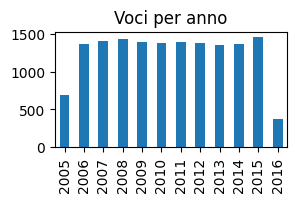

In [388]:
entries_yearly = pas.sort_values('Year')['Year'].value_counts(sort=False)

print(entries_yearly)
print(entries_yearly.plot(kind='bar', figsize=(3, 1.5), title='Voci per anno'))

Dal grafico potrebbe sembrare che ci siano stranamente poche voci nel 2005 e nel 2016, ma in realtà questo è più che altro una conseguenza del fatto che quegli anni sono troncati: il 2005 parte con Luglio, e il 2016 finisce a Marzo. Possiamo evidenziare questo fatto usando, anziché un normale grafico a barre, un grafico a barre 'impilate', che distingua i diversi mesi all'interno dell'anno.
<br>

```python
entries_yearly = pas.sort_values('Year')['Year'].value_counts(sort=False)
```
In questo caso, sto ordinando le righe numericamente per anno, ed esplicitamente impedendo alla funzione value_counts di ordinarle automaticamente per numero di voci.

Legend


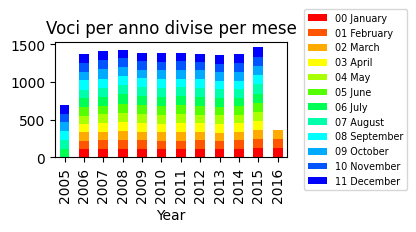

In [389]:
months_in_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']  # etc
numerical_months = {month: f"{i:02d} {month}" for i, month in enumerate(months_in_order)}

hexacolors = ['#ff0000', '#ff5500', '#ffaa00', '#ffff00', '#aaff00', '#55ff00', '#00ff55', '#00ffaa', '#00ffff', '#00aaff', '#0055ff', '#0000ff']

pas['Month'] = pas['Month'].map(lambda x : numerical_months.get(x, x))

entries_y_m = pas.groupby(['Year', 'Month'])['Year'].count().unstack('Month')

print(entries_y_m.plot(kind='bar', stacked=True, figsize=(3, 1.5), color=hexacolors, title="Voci per anno divise per mese").legend(loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize='x-small'))

```python
months_in_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                   'August', 'September', 'October', 'November', 'December']
numerical_months = {month: f"{i:02d} month" for i, month in enumerate(months_in_order)}

pas['Month'] = pas['Month'].map(lambda x : numerical_months.get(x, x))
```
Con questa porzione di codice sto generando un dizionario che appaia a ciascun mese la sua versione numerata a due cifre - ad esempio, "August" con "08 August", in maniera da rendere possibile ordinare i mesi numericamente anziché alfabeticamente. Una volta generato questo dizionario, uso la funzione "map" per rimpiazzare ciascun valore nella colonna "Month" con la sua versione numerica. Uso lambda, una funzione anonima, anziché definire una funzione molto piccola e a singolo uso.

"Hexacolors" non è altro che una lista di colori in formato esadecimale, ottenuta attraverso uno strumento online, usata per creare un gradiente arcobaleno anziché i colori casuali che verrebbero altrimenti usati.
<br>

```python
entries_y_m = pas.groupby(['Year', 'Month'])['Year'].count().unstack('Month')
```
Questa linea di codice raggruppa le voci in base a mese e anno, e per ciascuna combinazione di mese e anno conta il numero di occorrenze. Come risultato finale, crea un dataframe che ha come indice l'anno, come colonne i mesi, e come valori le conte di ciascuna combinazione.

<a id='pas_y'></a>
#### Passeggeri per anno

Il file contiene informazioni sul numero di passeggeri per ciascuna voce, e questo ci consente di creare un grafico per vedere quanti passeggeri ci siano stati in ciascun anno. Come prima, li divideremo per mese.

(Utilizziamo 'Adjusted Passenger Count' anziché semplicemente 'Passenger Count' in maniera da contare due volte i passeggeri di voli in transito, in quanto sono passeggeri di due voli: un volo in atterraggio e uno in partenza.)

Legend


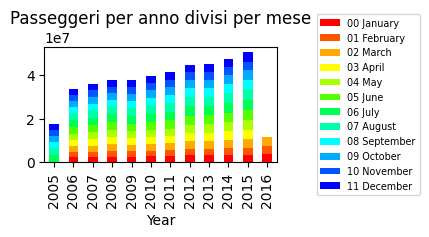

In [390]:
passengers_y_m = pas.pivot_table(values='Adjusted Passenger Count', index='Year', columns='Month', aggfunc=sum)

print(passengers_y_m.plot(kind='bar', stacked=True, figsize=(3, 1.5), color=hexacolors, title="Passeggeri per anno divisi per mese").legend(loc='center left', bbox_to_anchor=(1.15, 0.5), fontsize='x-small'))

Da questo grafico notiamo in maniera chiara un graduale aumento dei passeggeri di anno in anno. (Esclusi 2005 e 2016 per il menzionato artefatto dell'essere troncati.)
<br>

```python
passengers_y_m = pas.pivot_table(values='Adjusted Passenger Count', index='Year', columns='Month', aggfunc=sum)
```
Con questa linea di codice generiamo una tabella pivot. Gli arguments della funzione si spiegano da soli: l'indice è l'anno, le colonne sono i mesi, mentre i valori sono la somma dei passeggeri per quella combinazione.

<a id='pas_en_m'></a>
#### Voci per mese e passeggeri per mese

Possiamo anche vedere quali mesi abbiano più o meno voci in ciascun anno, e la stessa cosa per i passeggeri. In questo caso, utilizzo un grafico a linee per evidenziare l'andamento all'interno dei singoli anni.

Legend
Legend


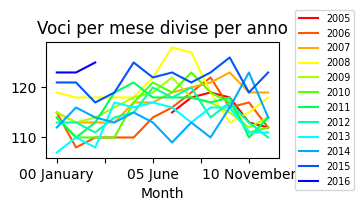

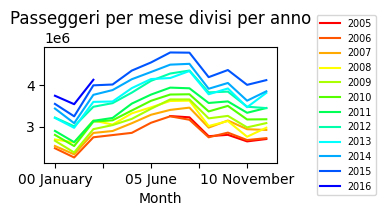

In [391]:
entries_m_y = pas.groupby(['Year', 'Month'])['Month'].count().unstack('Year')

print(entries_m_y.plot(kind='line', figsize=(3, 1.5), color=hexacolors, title="Voci per mese divise per anno").legend(loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize='x-small'))

passengers_m_y = pas.pivot_table(values='Adjusted Passenger Count', index='Month', columns='Year', aggfunc=sum)

print(passengers_m_y.plot(kind='line', figsize=(3, 1.5), color=hexacolors, title="Passeggeri per mese divisi per anno").legend(loc='center left', bbox_to_anchor=(1.15, 0.5), fontsize='x-small'))

Possiamo notare che, mentre il numero di voci al mese non segue nessun pattern concreto, il secondo grafico ci fornisce un risultato lampante: è chiarissimo che c'è un aumento costante di passeggeri da anno in anno, e non solo, possiamo vedere che abbiamo più passeggeri durante l'estate (con un picco massimo a Luglio), e meno passeggeri durante l'inverno (con una valle a Febbraio). Il perché di questo pattern è intuibile.

<a id='pas_geo'></a>
#### Passeggeri per regione

Dunque, qual è la regione del mondo da cui arrivano più passeggeri? E qual è quella per la quale partono più passeggeri?

Possiamo calcolare i valori per ciascuna di queste categorie avvalendoci della colonna 'Activity Type Code', che ci dice la conta dei passeggeri in arrivo, in partenza e in transito, e possiamo anche fare un grafico a torta per visualizzare questo dato.

Legend
                     Adjusted Passenger Count
GEO Region                                   
US                                  339042637
Asia                                 44213493
Europe                               26695446
Canada                               13901776
Mexico                                8084752
Australia / Oceania                   4786892
Middle East                           1852943
Central America                       1355400
South America                          250741
Legend


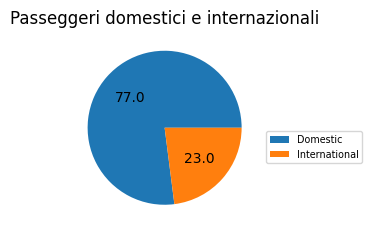

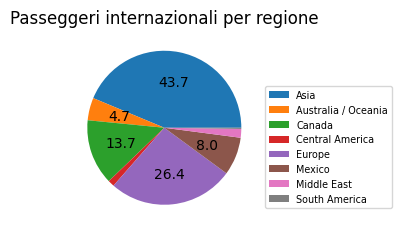

In [392]:
passengers_by_geosum = pas.pivot_table(values='Adjusted Passenger Count', index='GEO Summary', aggfunc=sum)

print(passengers_by_geosum.plot(kind='pie', y='Adjusted Passenger Count', figsize=(5, 2.5), title="Passeggeri domestici e internazionali", ylabel='', autopct='%.1f', labeldistance=None).legend(loc='center left', bbox_to_anchor=(1, 0.4), fontsize='x-small'))

# --------------

def no_low_pct(pct):
    return ('%.1f' % pct) if pct > 4 else ''

passengers_by_region = pas.pivot_table(values='Adjusted Passenger Count', index='GEO Region', aggfunc=sum)

print(passengers_by_region.sort_values('Adjusted Passenger Count', ascending=False))

passengers_by_region = passengers_by_region.iloc[:-1, :]

print(passengers_by_region.plot(kind='pie', y='Adjusted Passenger Count', figsize=(5, 2.5), title="Passeggeri internazionali per regione", ylabel='', autopct=no_low_pct, labeldistance=None).legend(loc='center left', bbox_to_anchor=(1, 0.4), fontsize='x-small'))

Come possiamo notare, più di tre quarti dei passeggeri sono domestici, e grande parte dei passeggeri internazionali va in Asia o viene dall'Asia, o, al secondo posto, in Europa o dall'Europa.

Si noti anche il fatto che l'America è stata suddivisa in US, Canada e Mexico più Central America e South America, mentre regioni come Asia ed Europa, seppur molto vaste, sono rimaste unitarie.
<br>

```python
def no_low_pct(pct):
    return ('%.1f' % pct) if pct > 4 else ''
```
Questa piccola funzione viene usata per evitare che autopct etichetti le percentuali di fette troppo sottili del grafico a barre, evitando quindi sovrapposizione di etichette confusionaria ed esteticamente spiacevole.
<br>

```python
passengers_by_region = passengers_by_region.iloc[:-1, :]
```
Questa linea di codice serve a eliminare l'ultima riga del dataframe - in questo caso, visto che l'abbiamo ordinato, sarà quella corrispondente ad "US".

<a id='pas_airlines'></a>
#### Compagnie aeree per passeggeri

Vediamo ora quali sono le compagnie aeree che hanno avuto il maggior numero di passeggeri. In questo caso, visto il grande numero di compagnie, creare un grafico richiederà accumulare buona parte delle compagnie sotto un'unica voce di 'altre', "Others". In questo caso, raggruppiamo tutte le compagnie aeree che non rientrano nella top 10.

                                  Adjusted Passenger Count
United Airlines - Pre 07/01/2013                 106333323
United Airlines                                   64961880
SkyWest Airlines                                  35711773
American Airlines                                 34588714
Virgin America                                    26934738
...                                                    ...
Southwest Airlines                                25098015
US Airways                                        16816616
Alaska Airlines                                   13191073
JetBlue Airways                                    7827973
Others                                            82273023

[11 rows x 1 columns]
                                  Adjusted Passenger Count
United Airlines - Pre 07/01/2013                  0.241566
United Airlines                                   0.147579
SkyWest Airlines                                  0.081129
American Airlines                

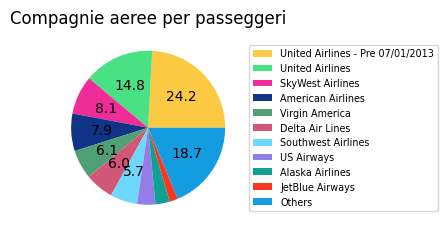

In [393]:
passengers_by_airline = pas.pivot_table(values='Adjusted Passenger Count', index='Operating Airline', aggfunc=sum).sort_values('Adjusted Passenger Count', ascending=False)

top_10_airlines = passengers_by_airline[:10].copy()

other_airlines_row = pd.DataFrame(data = {
    'Adjusted Passenger Count' : [passengers_by_airline['Adjusted Passenger Count'][10:].sum()]
})
other_airlines_row.index = ['Others']

pas_by_airline_lumpothers = pd.concat([top_10_airlines, other_airlines_row])

print(pas_by_airline_lumpothers)

hexacolors_vibrant = ['#fcc942', '#4ae185', '#f02c98', '#133389', '#519f75', '#d25776', '#6fd6fc',
                      '#937ee9', '#11a091', '#fb3621', '#139de0', '#faa032']

pas_by_airline_lumpothers_norm = pas_by_airline_lumpothers.div(pas_by_airline_lumpothers.sum(axis='index'), axis='columns')

print(pas_by_airline_lumpothers_norm)

print(pas_by_airline_lumpothers.plot(kind='pie', y='Adjusted Passenger Count', figsize=(5, 2.5), title="Compagnie aeree per passeggeri", ylabel='', autopct=no_low_pct, labeldistance=None, colors=hexacolors_vibrant).legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='x-small'))

Per raggruppare le compagnie aeree più piccole in un'unica voce "Others", ho diviso il dataframe in due: una porzione fino alla riga 10, e un'altra dalla riga 10 in poi. Ho poi sommato le righe di questo secondo dataframe e l'ho poi concatenato alle prime 10.

<a id='fare_airlines'></a>
#### Compagnie aeree e voli low-fare

Quali sono le compagnie aeree che effettuano voli low-fare (cioè a basso prezzo)?

In [394]:
airlines_by_fare = pas.pivot_table(values='Adjusted Passenger Count', index='Operating Airline', columns='Price Category Code', aggfunc=sum).fillna(0)

airlines_by_fare_ratio = airlines_by_fare.div(airlines_by_fare.sum(axis='columns'), axis='index').sort_values('Low Fare', ascending=False)

airlines_by_fare_ratio.rename(index={'United Airlines - Pre 07/01/2013':'United Airlines (Old)'}, inplace=True)
print(airlines_by_fare_ratio[airlines_by_fare_ratio['Low Fare'] == 1])
print(airlines_by_fare_ratio[(airlines_by_fare_ratio['Low Fare'] > 0) & (airlines_by_fare_ratio['Low Fare'] < 1)])
print(airlines_by_fare_ratio[airlines_by_fare_ratio['Low Fare'] == 0])

Price Category Code   Low Fare  Other
Operating Airline                    
ATA Airlines               1.0    0.0
AirTran Airways            1.0    0.0
Independence Air           1.0    0.0
Frontier Airlines          1.0    0.0
Servisair                  1.0    0.0
Southwest Airlines         1.0    0.0
Spirit Airlines            1.0    0.0
Sun Country Airlines       1.0    0.0
Allegiant Air              1.0    0.0
JetBlue Airways            1.0    0.0
Price Category Code    Low Fare     Other
Operating Airline                        
Virgin America         0.999973  0.000027
US Airways             0.120093  0.879907
United Airlines (Old)  0.041421  0.958579
Delta Air Lines        0.011371  0.988629
Emirates               0.005578  0.994422
Air China              0.004479  0.995521
Air New Zealand        0.003724  0.996276
SkyWest Airlines       0.000032  0.999968
Price Category Code  Low Fare  Other
Operating Airline                   
Swiss International       0.0    1.0
Turkish Airli

Vediamo quindi che ci sono:
- 10 compagnie aeree che fanno esclusivamente voli low-fare.
- 8 che fanno un po' l'uno e un po' l'altro (però generalmente con un rapporto di passeggeri molto spostato da una delle due parti).
- 59, cioè la stragrande maggioranza delle compagnie aeree, che non fa voli low-fare.

Con un confronto veloce con il grafico delle compagnie aeree per passeggeri, riscontriamo che:
- Southwest Airlines è l'unica compagnia aerea esclusivamente low-fare nella top 10 per numero di passeggeri.
- Delta Airlines e United Airlines pre-07/01/2013 sono le uniche due compagnie aeree nella top 10 che hanno fatto sia voli low-fare che non, ma entrambe hanno fatto meno del 5% di passeggeri low-fare.

<a id='fare_passengers'></a>
#### Passeggeri low-fare e non

Abbiamo visto che ci sono relativamente poche compagnie low-fare, ma quanti passeggeri scelgono di volare low-fare, in proporzione al numero di compagnie che offrono voli low-fare?

Price Category Code
Low Fare     75208107.0
Other       364975973.0
dtype: float64
Price Category Code
Low Fare    11.186671
Other       65.813329
dtype: float64
[<AxesSubplot: ylabel='Passengers by fare'>
 <AxesSubplot: ylabel='Airlines by fare'>]


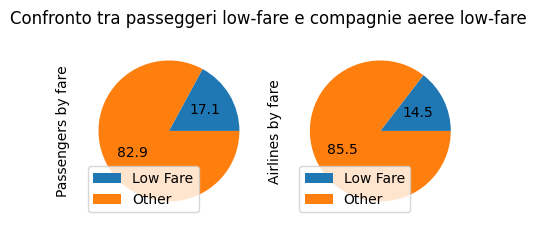

In [395]:
passengers_by_fare = airlines_by_fare.sum(axis=0)

print(passengers_by_fare)

total_airline_fare_ratio = airlines_by_fare_ratio.sum(axis=0)

print(total_airline_fare_ratio)

fare_ratio_comparison = pd.concat([passengers_by_fare, total_airline_fare_ratio], axis= 1)

fare_ratio_comparison.columns = ['Passengers by fare', 'Airlines by fare']

print(fare_ratio_comparison.plot(kind='pie', subplots=True, figsize=(5, 2.5), title="Confronto tra passeggeri low-fare e compagnie aeree low-fare", autopct='%.1f', labeldistance=None))

Notiamo dunque che c'è una piccola differenza: c'è una maggiore percentuale di passeggeri che volano low-fare (17.1%) piuttosto che compagnie aeree che li offrono (14.5%). Questo potrebbe avere diversi motivi: una preferenza dei clienti per voli economici, o una maggiore difficoltà nel gestire una compagnia aerea low-fare con margini di guadagno necessariamente esigui.

In questo caso ho concatenato orizzontalmente due dataframes per ottenere un unico grafico con due sottografici.